In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\mhija\Desktop\new things\DATA\penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [42]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [53]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [52]:
df[df['species'] == 'Adelie'].groupby('sex').describe().transpose()
# 8 =m 9 ,11 =m 10 47 =F'
df.at[(8,9,11),'sex'] = 'MALE'
df.at[(10,47),'sex'] = 'FEMALE'

In [40]:
df.drop(339,axis=0,inplace=True)

In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [16]:
df[df['sex'] =='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [18]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [45]:
# note == that you check if this something exsicits or not 
#but if want to assign value to it, use = only one =
df.at[336,'sex'] ='FEMALE'
df.at[324,'sex'] = 'MALE'
df.at[(246,286),'sex'] = 'FEMALE'

In [31]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

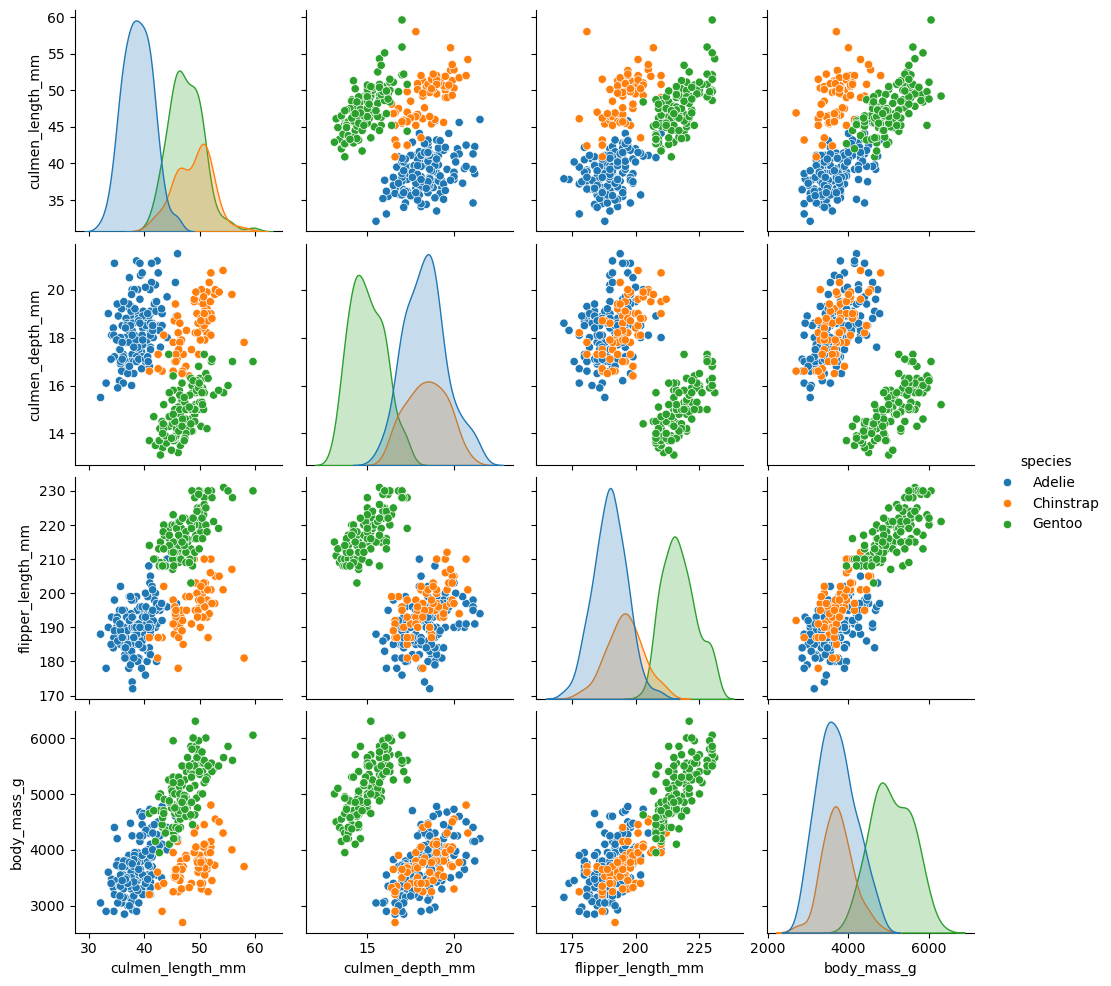

In [24]:
sns.pairplot(df ,hue='species')

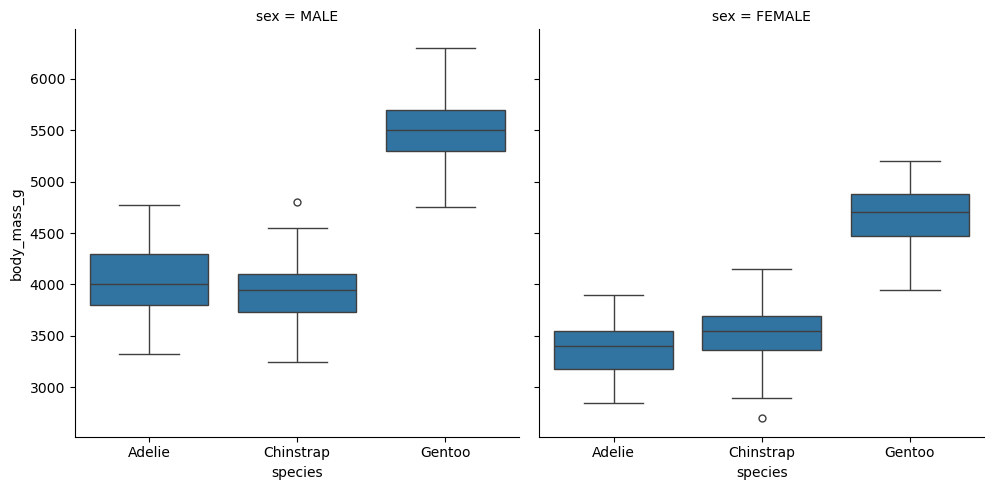

In [26]:
sns.catplot(x='species',y='body_mass_g',data=df,kind='box',
            col = 'sex')

In [ ]:
# Only apply get_dummies to non-numeric columns, and drop the target column
X = df.drop('species', axis=1)
X = pd.get_dummies(X, drop_first=True).astype(int)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array(['Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Ade

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9557522123893806
Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.91      0.95        54
   Chinstrap       0.80      1.00      0.89        20
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.96       113
   macro avg       0.93      0.97      0.95       113
weighted avg       0.96      0.96      0.96       113



In [67]:
pd.DataFrame(index = X.columns, data = model.feature_importances_,columns=['feature_importances_']).sort_values('feature_importances_')

,feature_importances_
body_mass_g,0.000000
island_Torgersen,0.000000
island_Dream,0.011335
sex_MALE,0.020403
culmen_depth_mm,0.080346
culmen_length_mm,0.369152
flipper_length_mm,0.518765


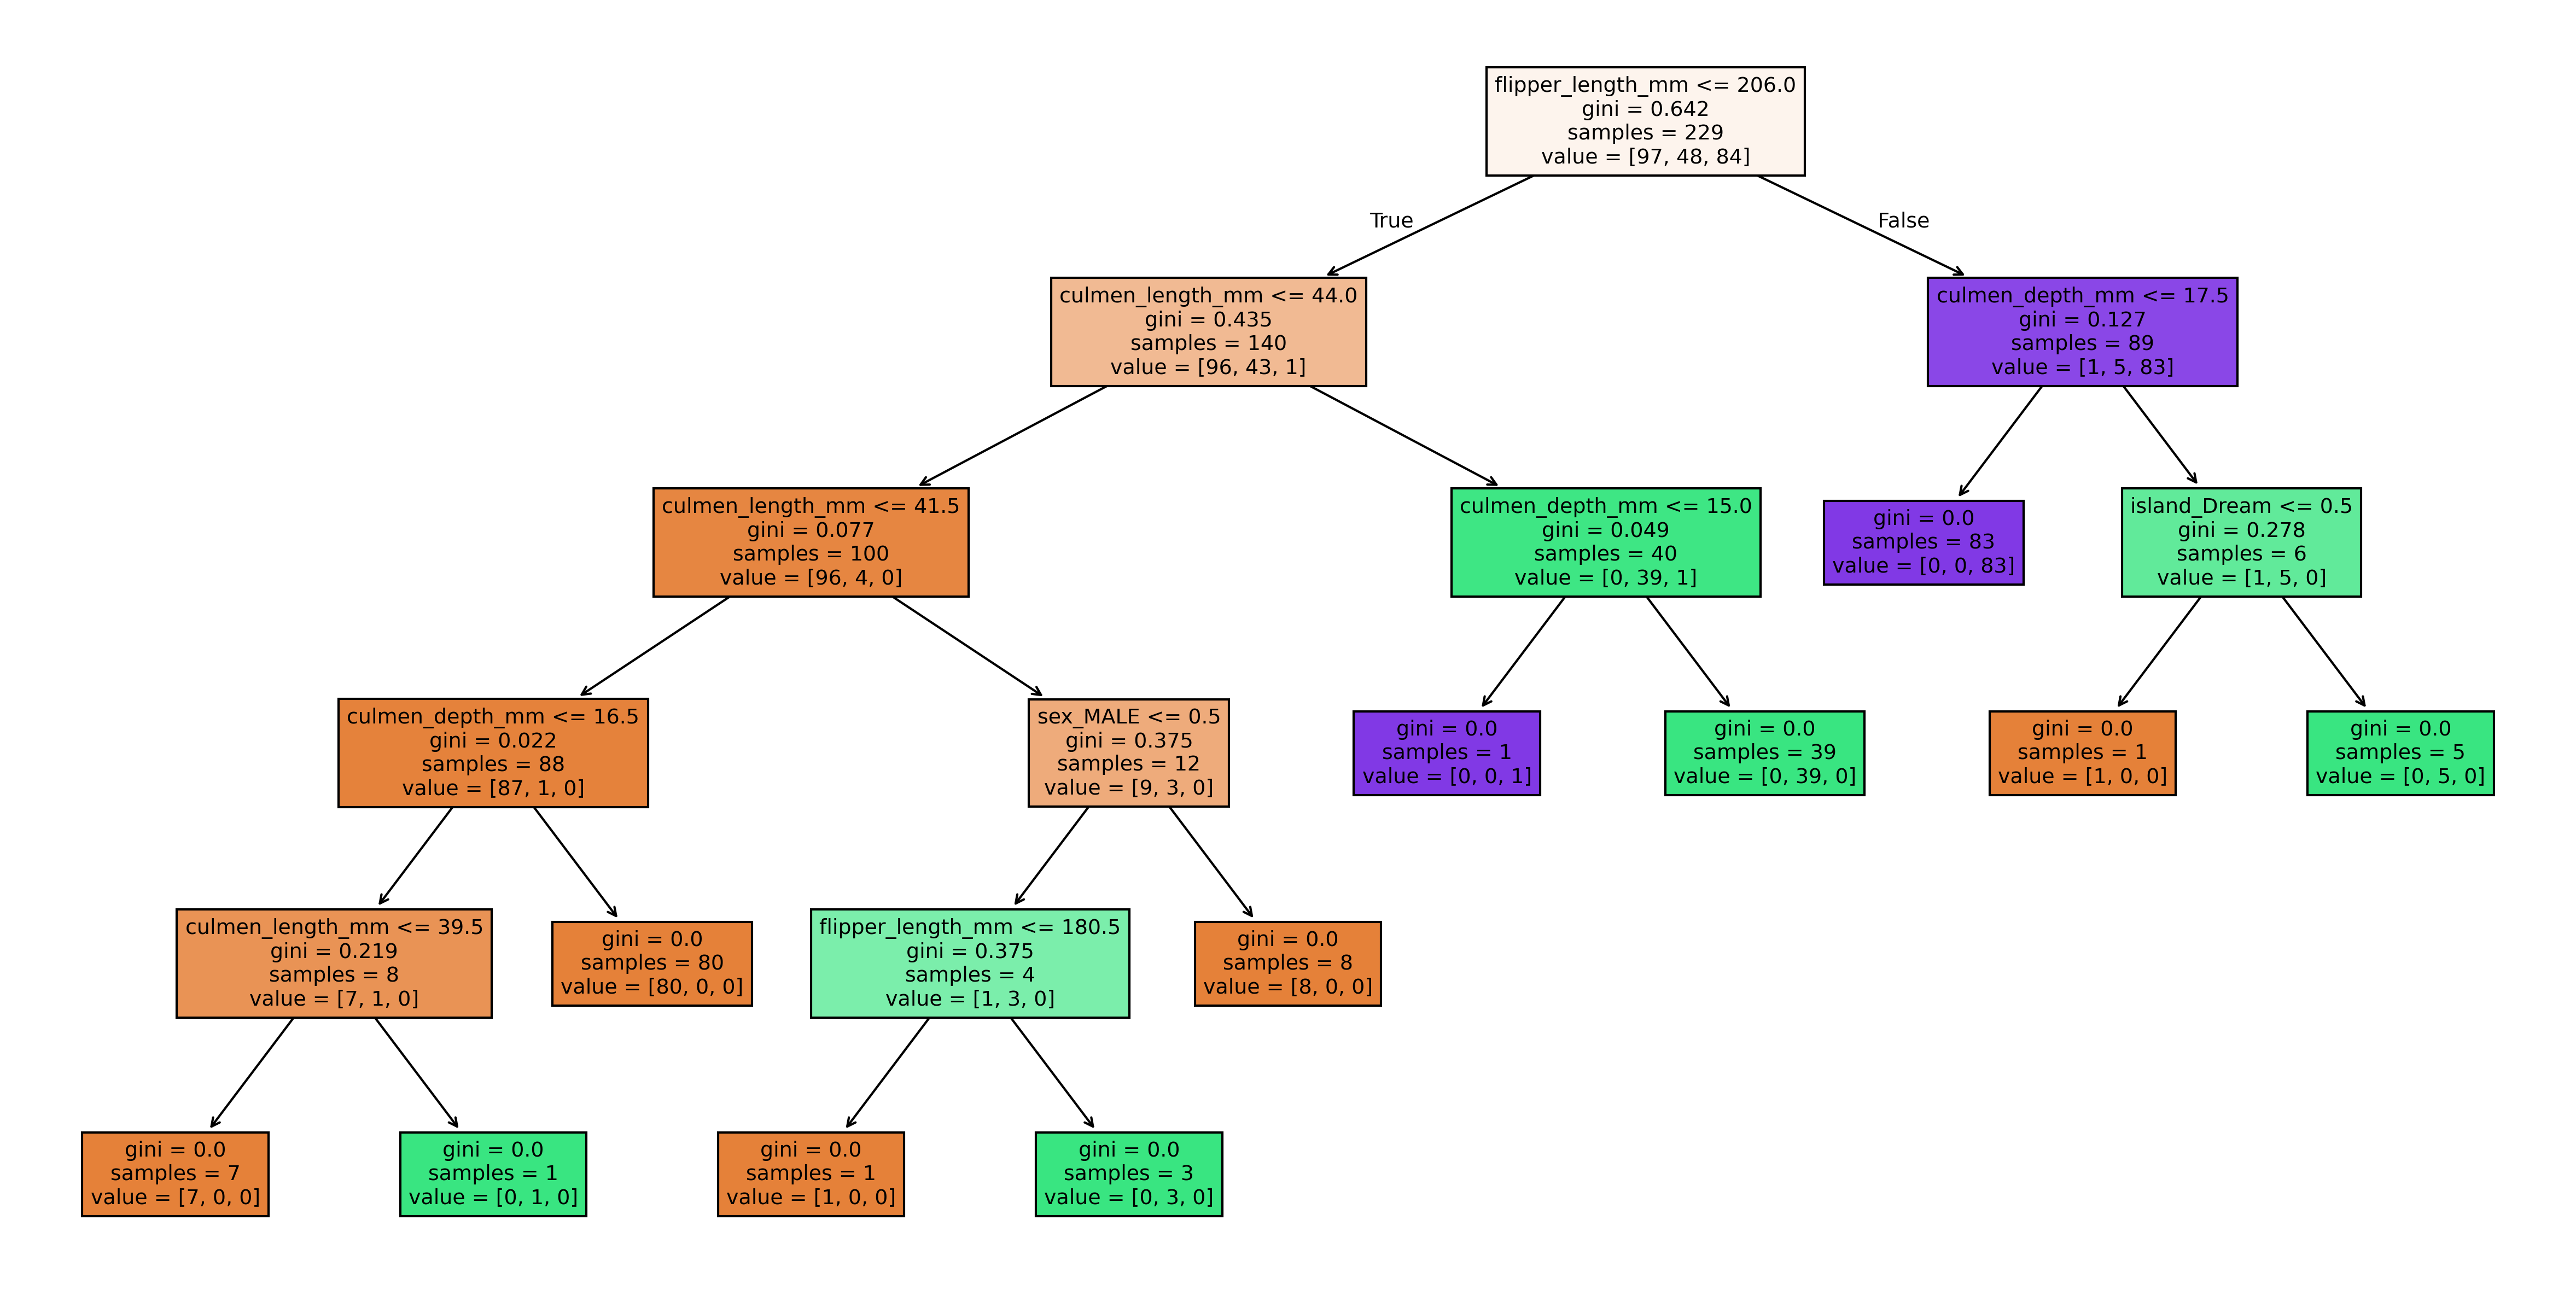

In [71]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10),dpi=300)
plot_tree(model,feature_names=X.columns, filled=True);

In [73]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(20,10),dpi=300)
    plot_tree(model,feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.96      0.93      0.94        54
   Chinstrap       0.95      0.90      0.92        20
      Gentoo       0.93      1.00      0.96        39

    accuracy                           0.95       113
   macro avg       0.95      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113





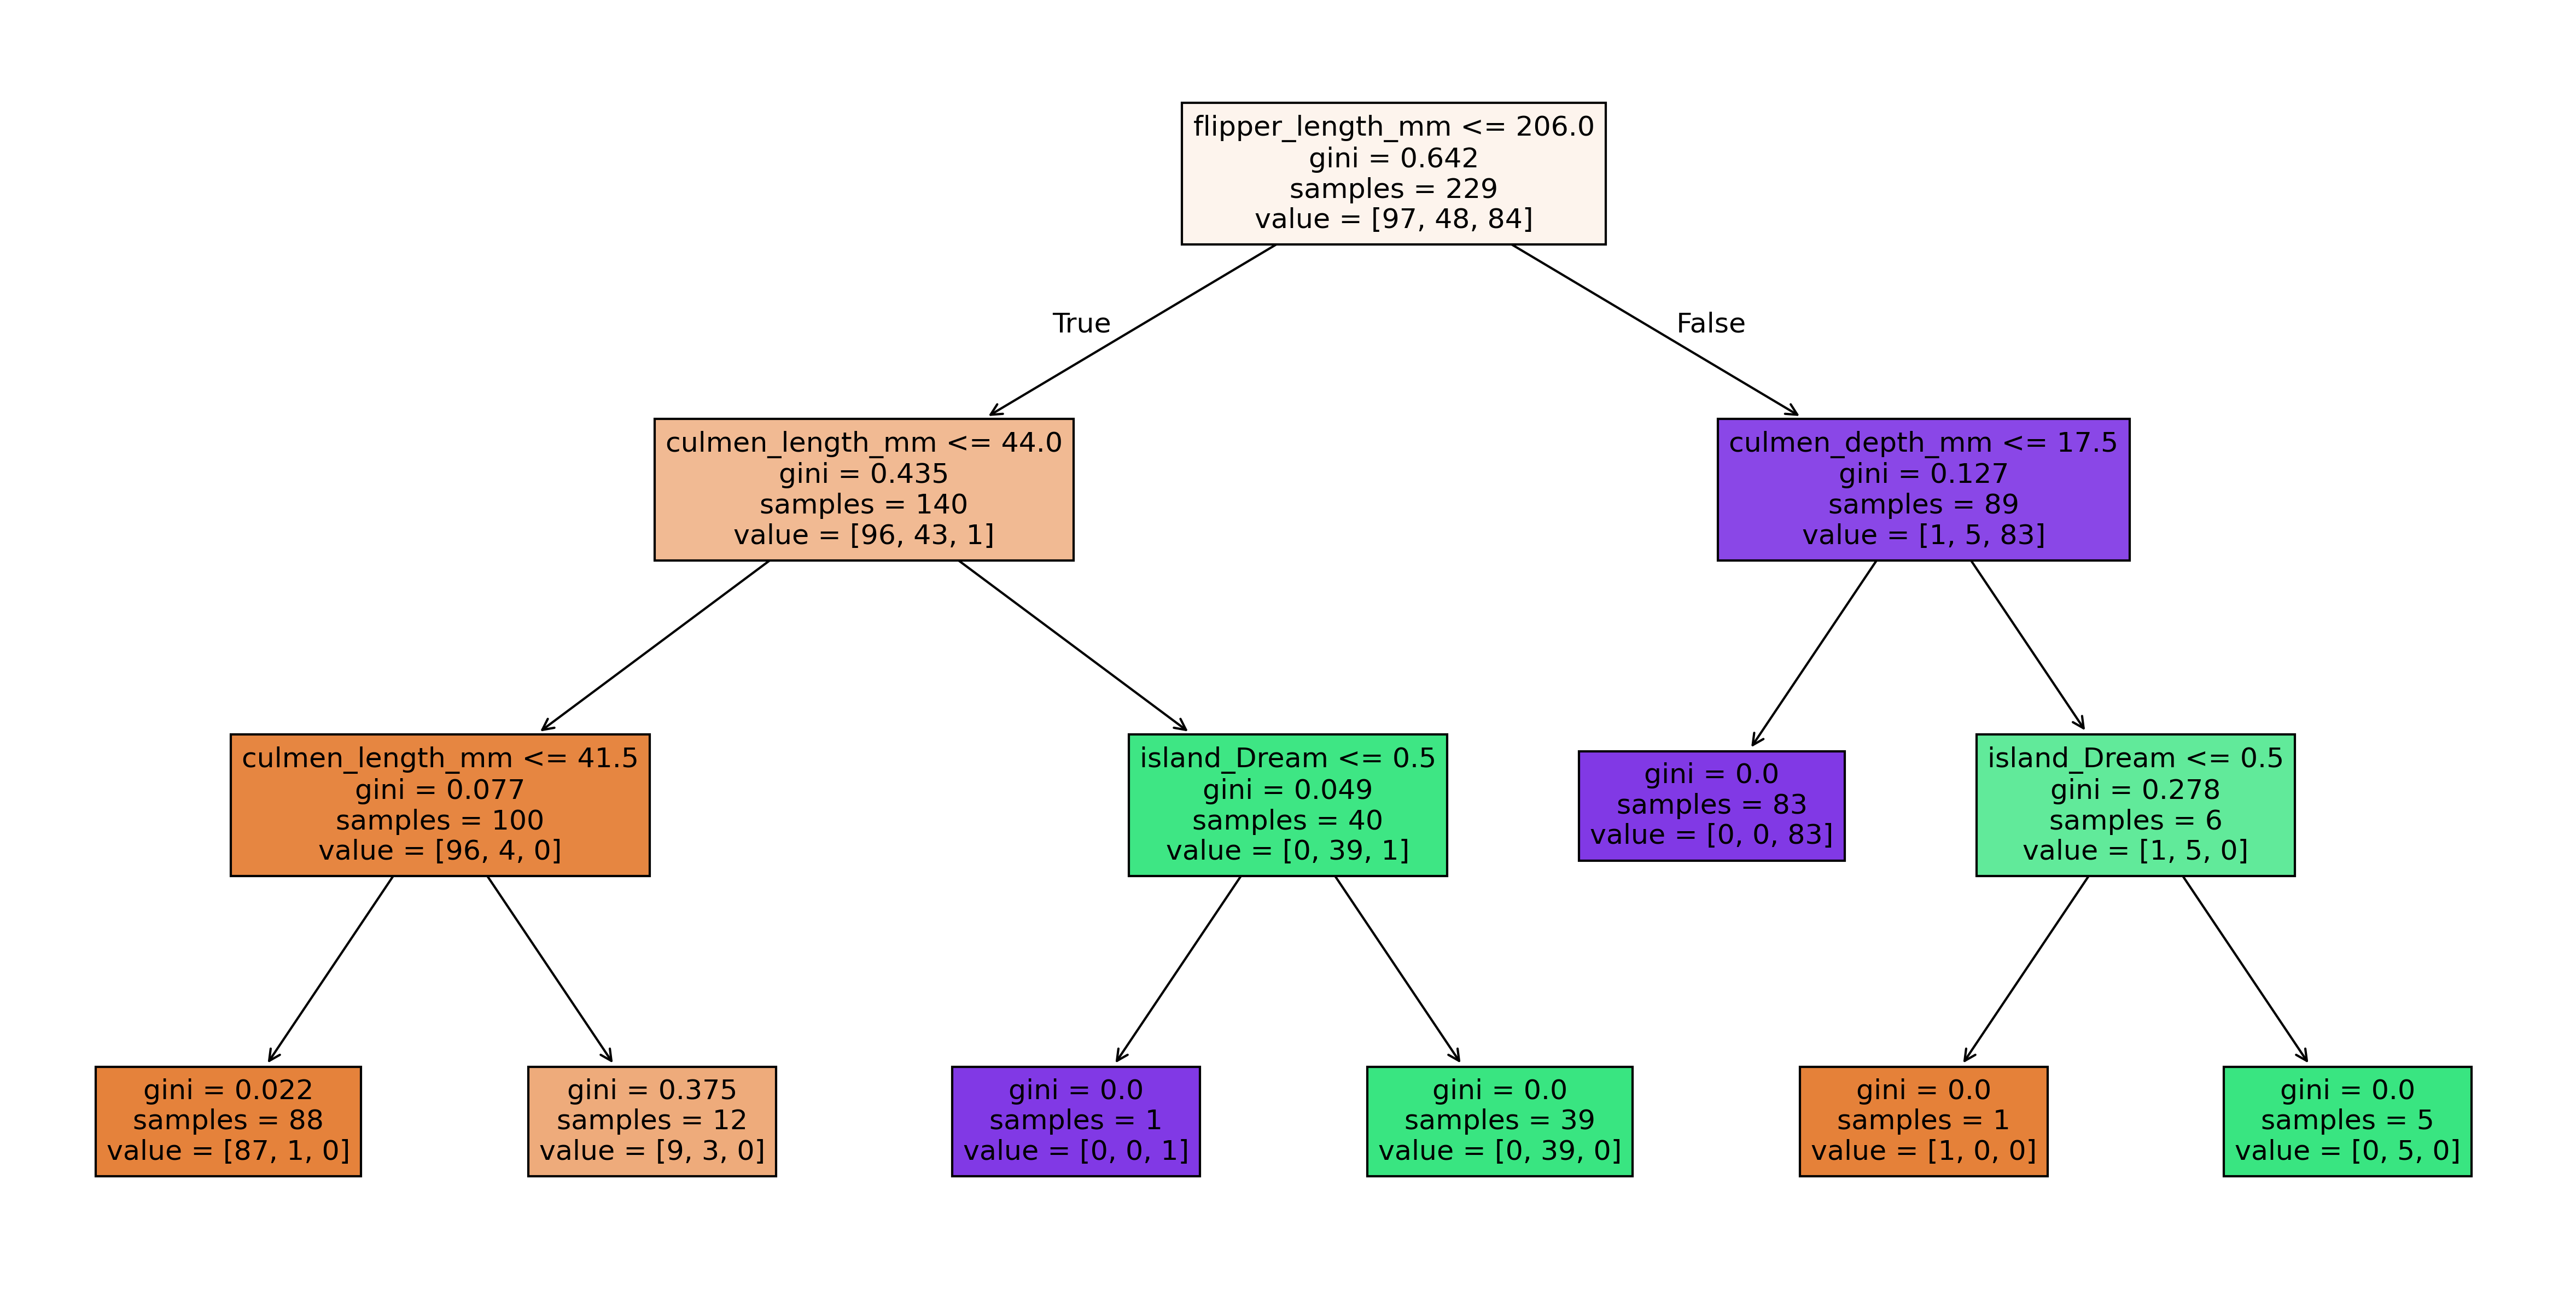

In [75]:
depth = DecisionTreeClassifier(max_depth=3)
depth.fit(X_train, y_train)
report_model(depth)

              precision    recall  f1-score   support

      Adelie       0.96      0.93      0.94        54
   Chinstrap       0.86      0.90      0.88        20
      Gentoo       0.97      1.00      0.99        39

    accuracy                           0.95       113
   macro avg       0.93      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113





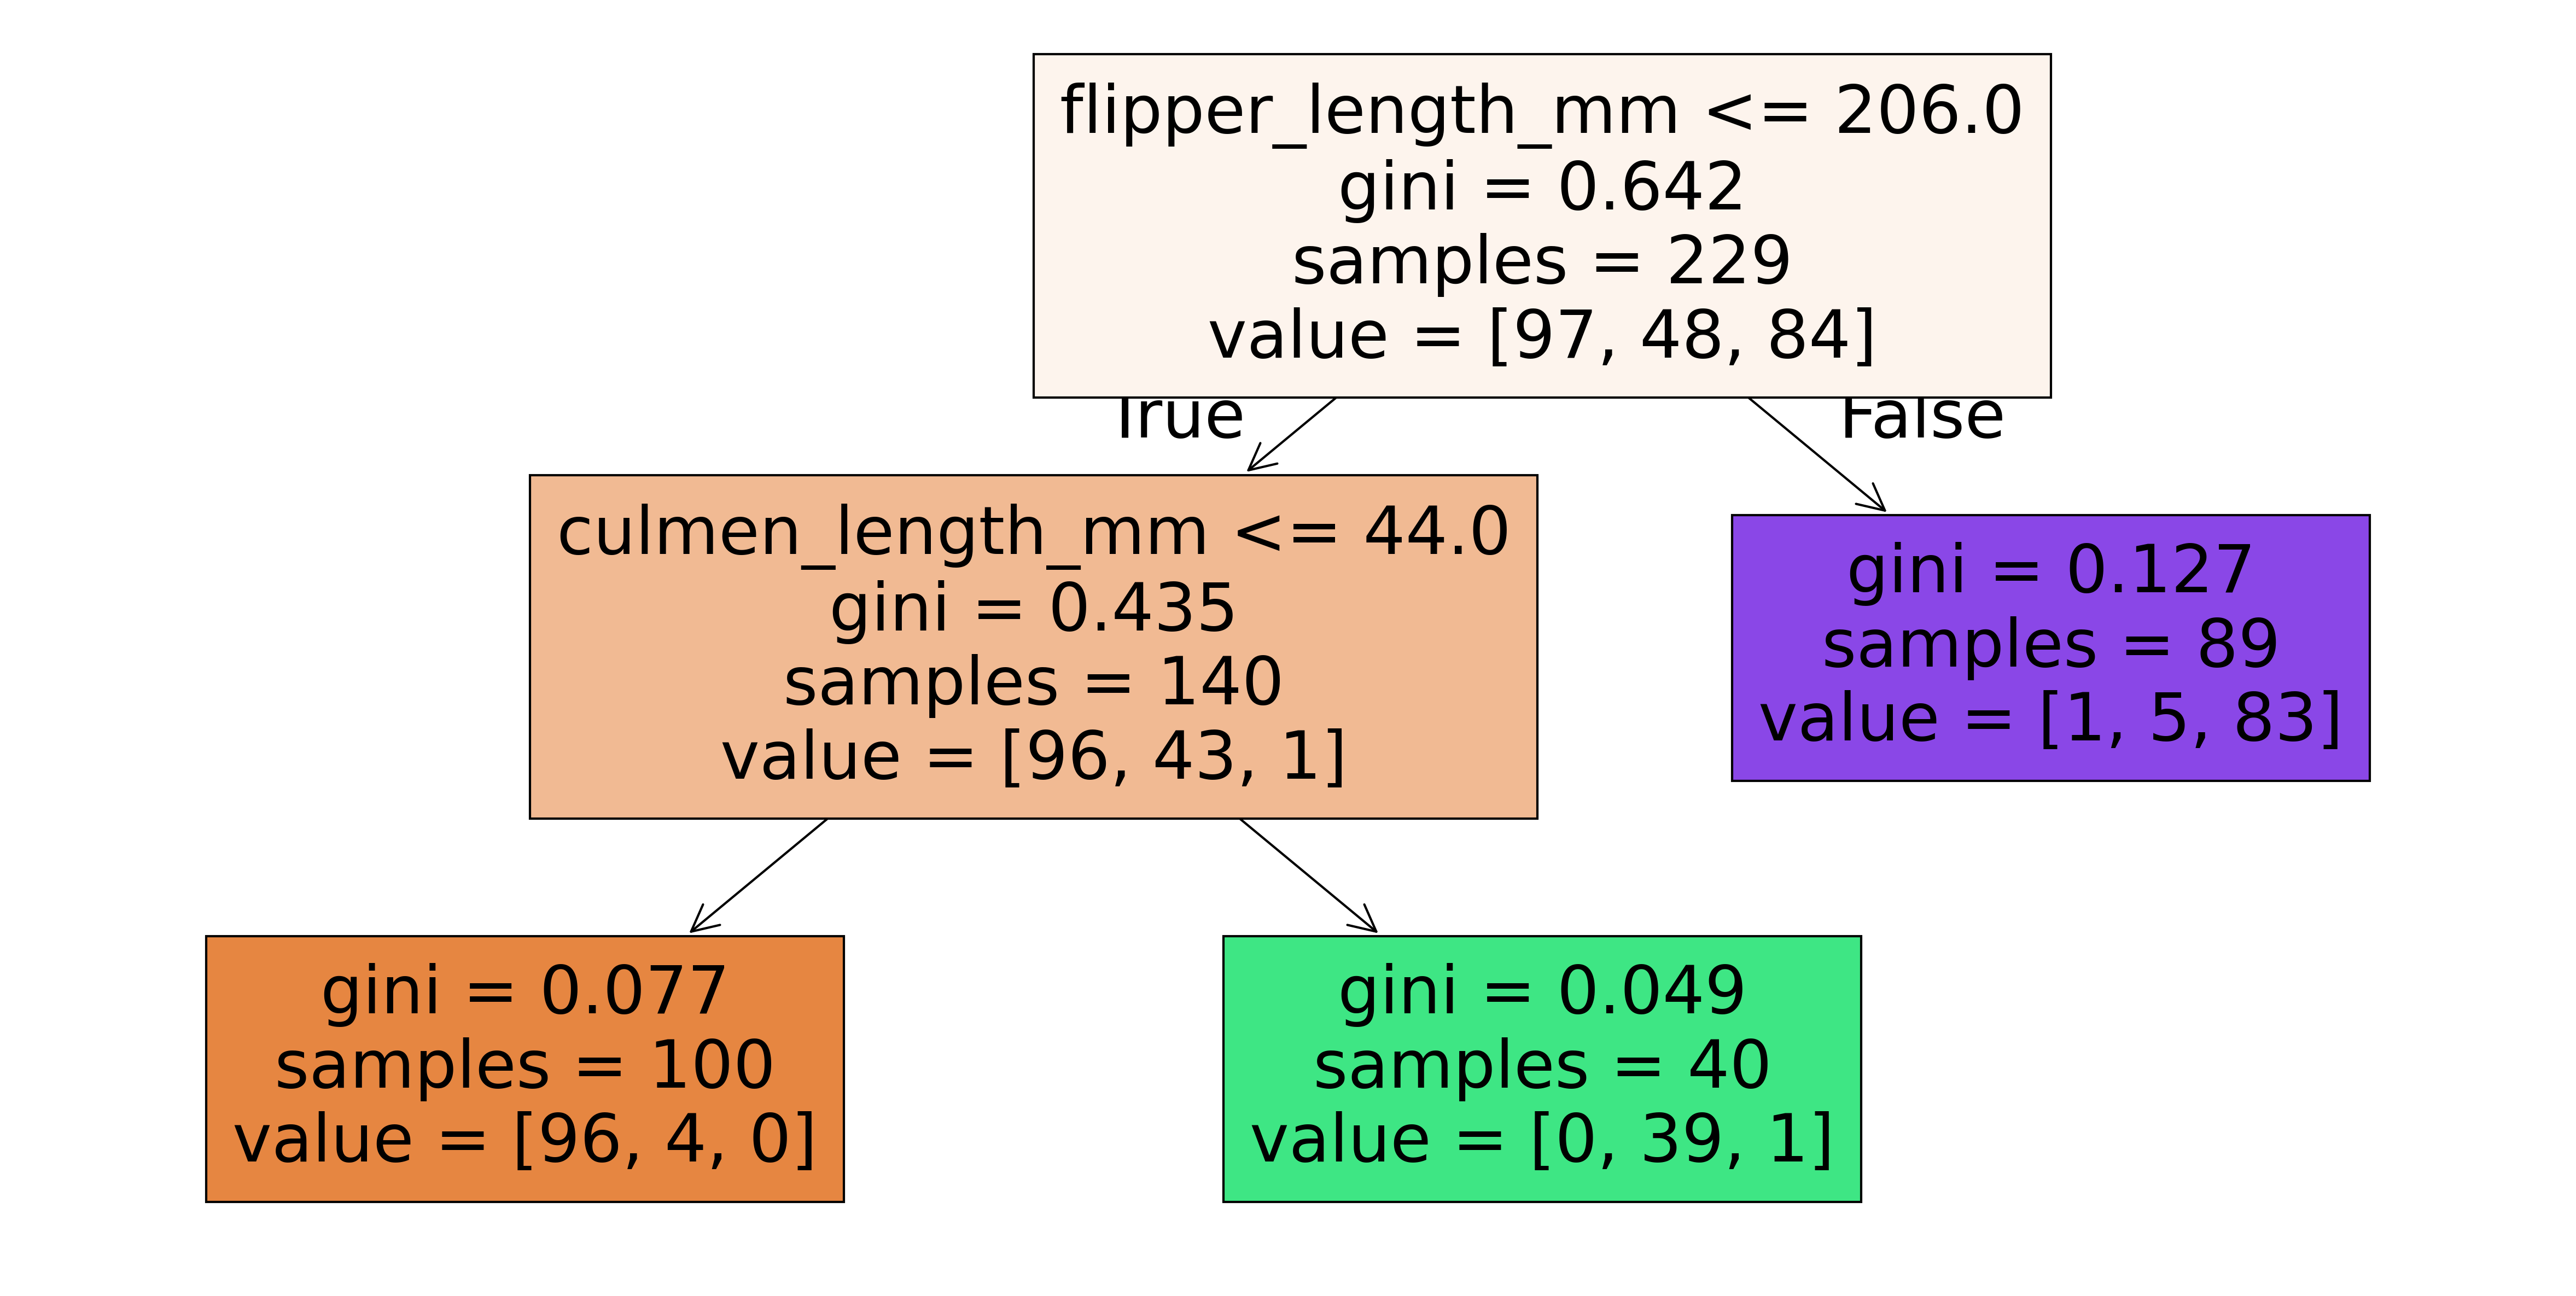

In [74]:
max_leaf = DecisionTreeClassifier(max_leaf_nodes=3)
max_leaf.fit(X_train, y_train)
report_model(max_leaf)

              precision    recall  f1-score   support

      Adelie       1.00      0.91      0.95        54
   Chinstrap       0.80      1.00      0.89        20
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.96       113
   macro avg       0.93      0.97      0.95       113
weighted avg       0.96      0.96      0.96       113





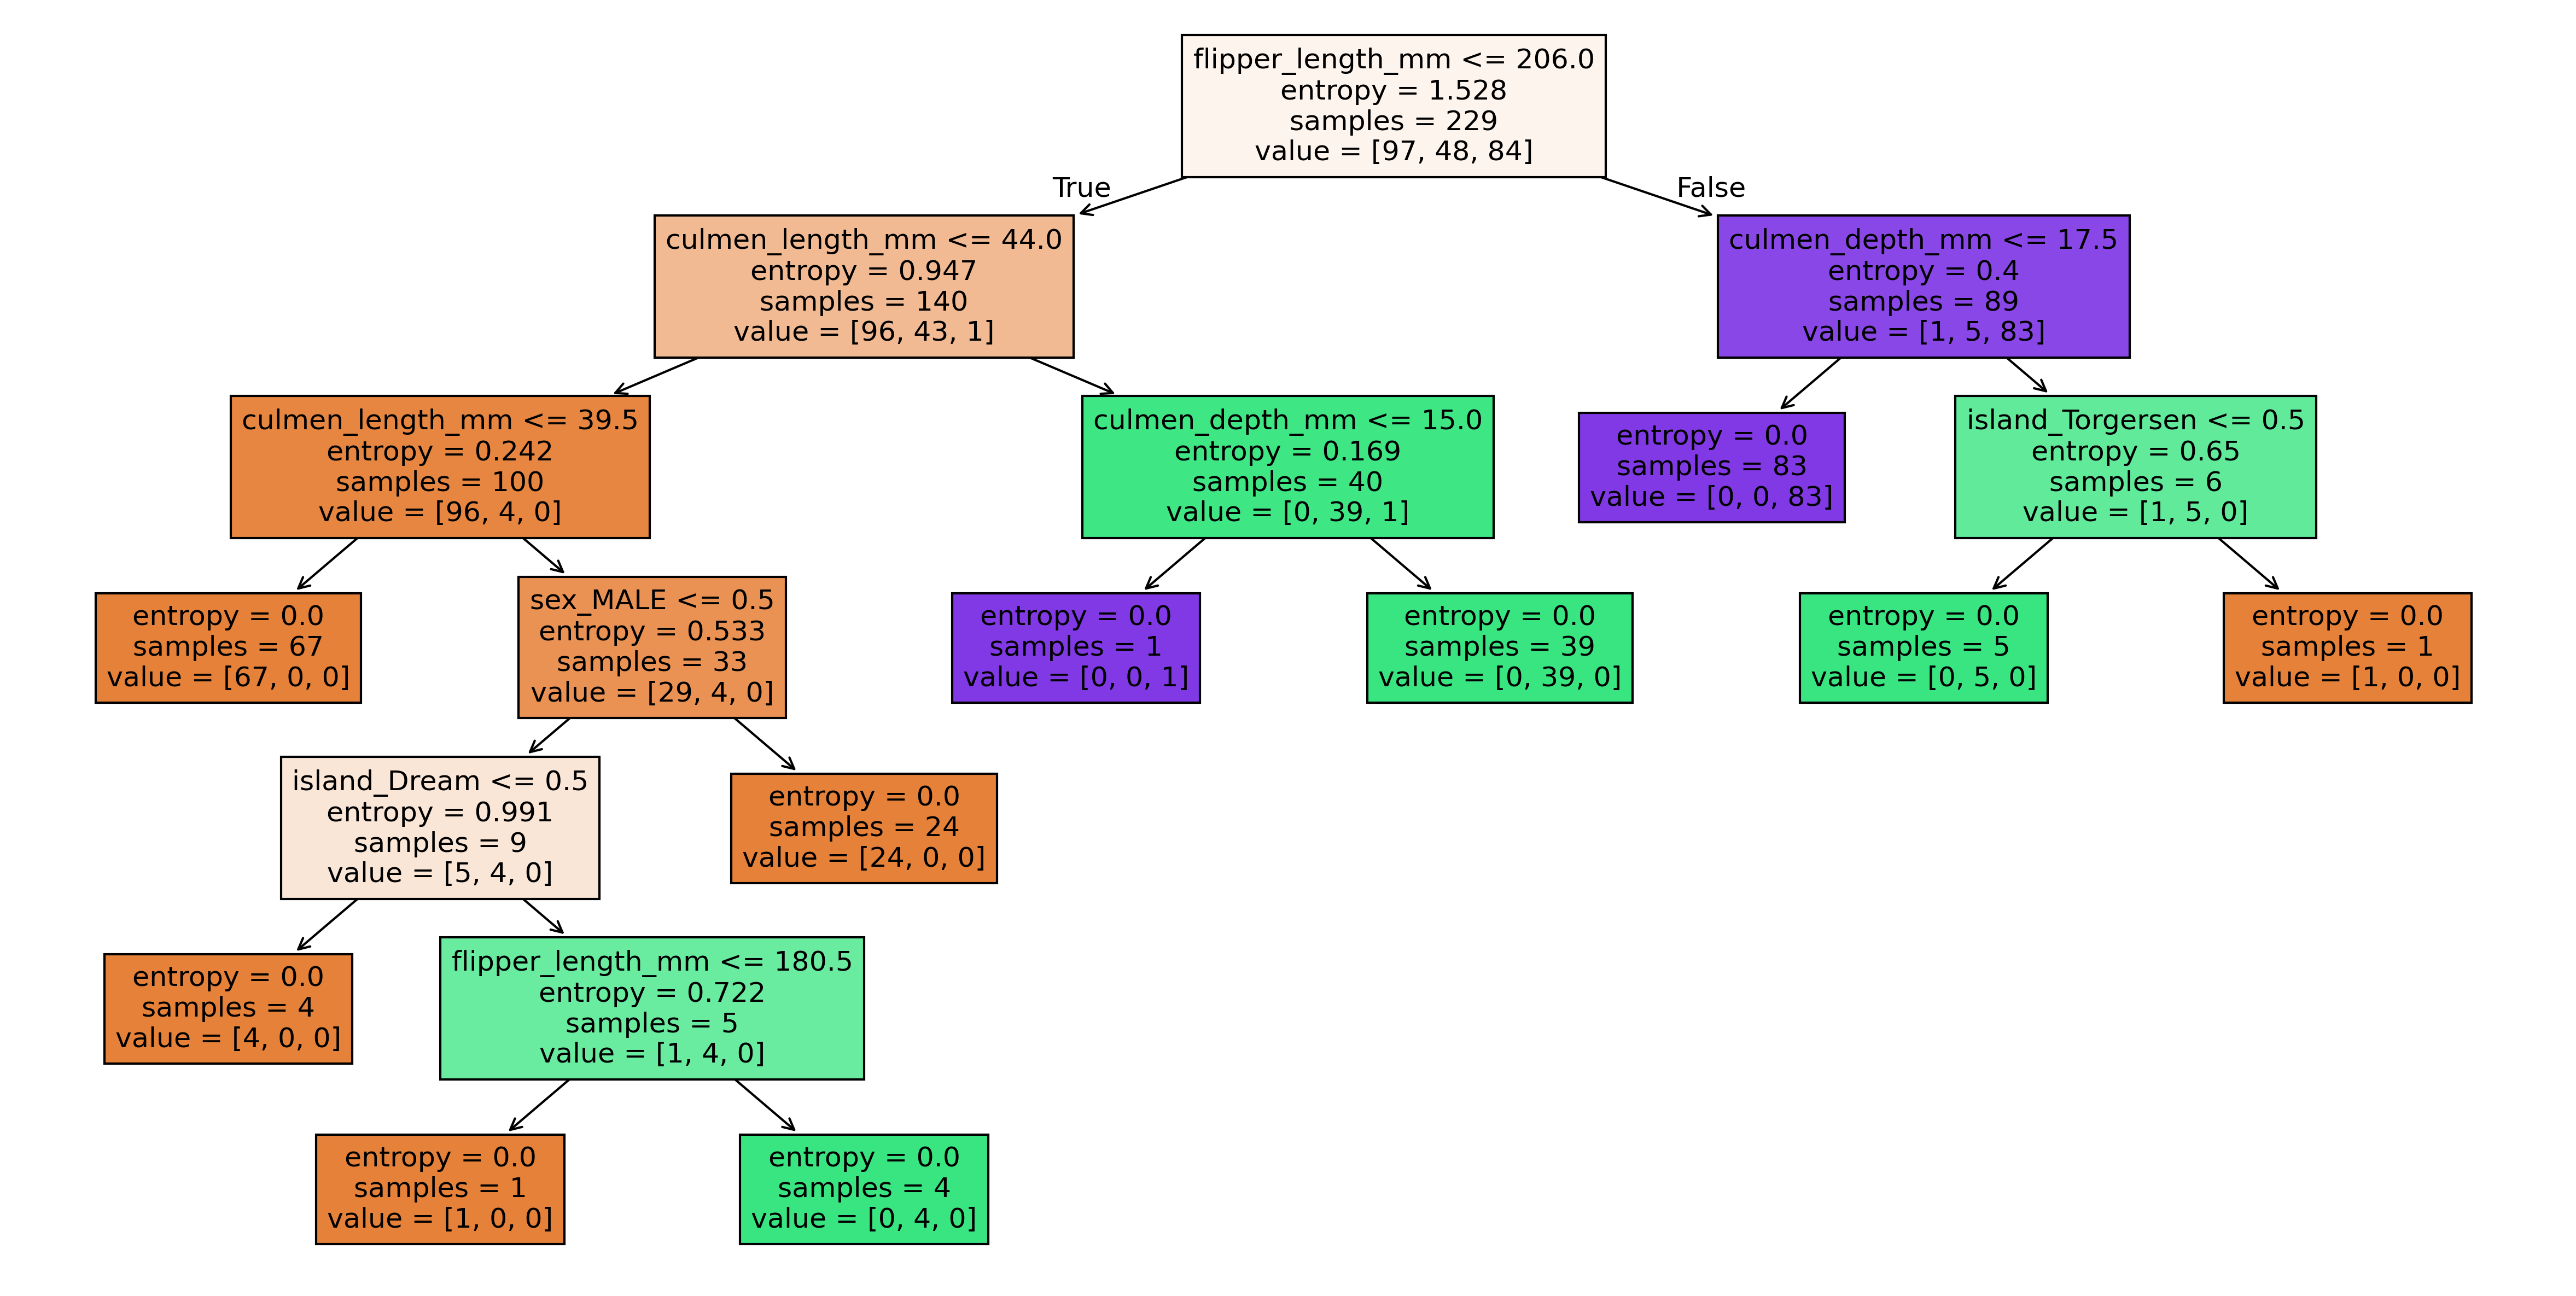

In [76]:
entropy = DecisionTreeClassifier(criterion='entropy')
entropy.fit(X_train, y_train)
report_model(entropy)

In [78]:
df.to_csv('penguins_size_cleaned1.csv',index=False)